In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import silhouette_samples, silhouette_score

In [5]:
plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='white')

In [3]:
df = pd.read_csv('D:/사고데이터/사고건수사망자수_60.csv')
df

,pattern,발생일시,사망자수,prob.,누적확률
0,AMPE-C-MR1-D1C1,2085,54,0.033298,0.033298
1,AMPE-C-MR1-D1C2,1874,125,0.029928,0.063226
2,AMPE-C-SR1-D1C2,1708,111,0.027277,0.090503
3,AMPE-C-SI2-D1C1,1483,61,0.023684,0.114186
4,AMPE-C-MI2-D1C1,1410,47,0.022518,0.136704
...,...,...,...,...,...
101,BUPE-C-SI2-T1C1,104,3,0.001661,0.591054
102,BUPE-C-SR1-D1C1,103,11,0.001645,0.592698
103,AMPE-C-MI1-T2C2,101,1,0.001613,0.594311
104,AMPE-P-SI2-D1C1,100,4,0.001597,0.595908


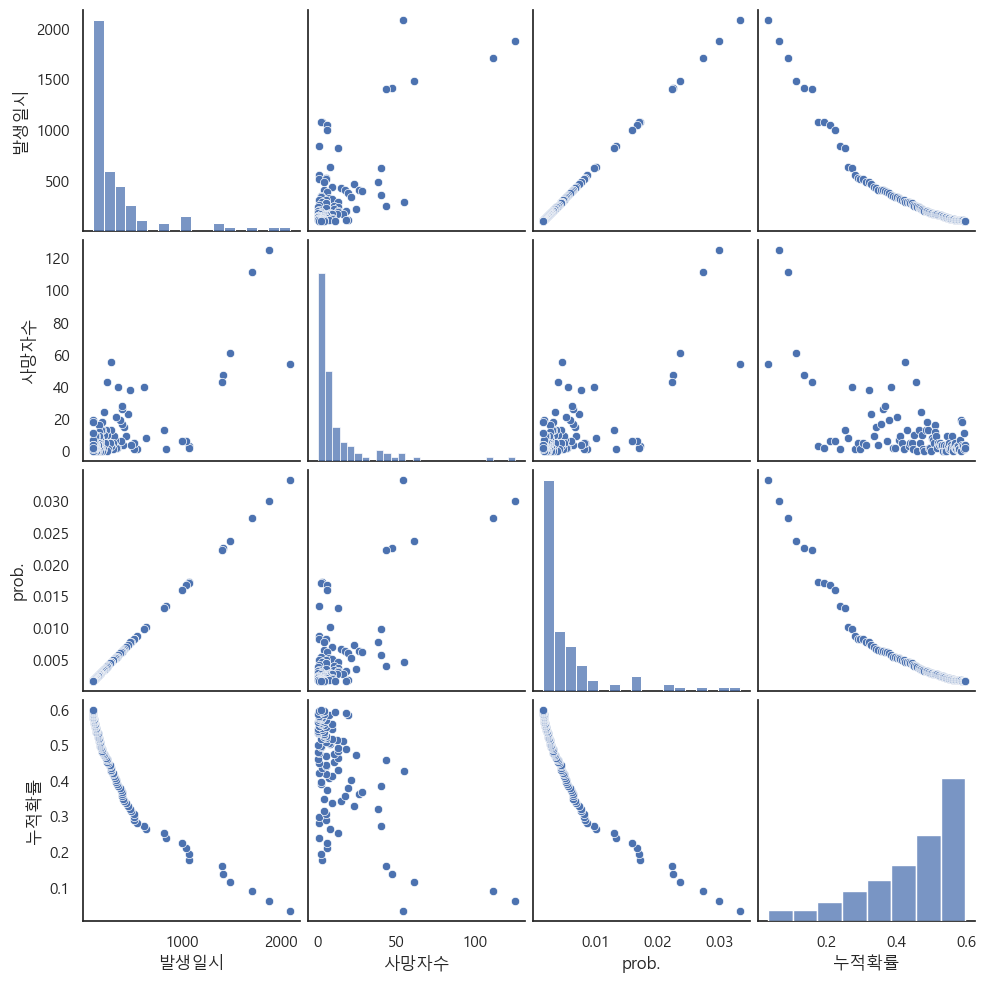

In [7]:
sns.pairplot(df[['pattern', '발생일시', '사망자수', 'prob.',
       '누적확률']])
plt.show()

C:\Users\hyorim\AppData\Local\Temp\ipykernel_21056\3341191851.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['발생일시'])


<AxesSubplot: xlabel='발생일시', ylabel='Density'>

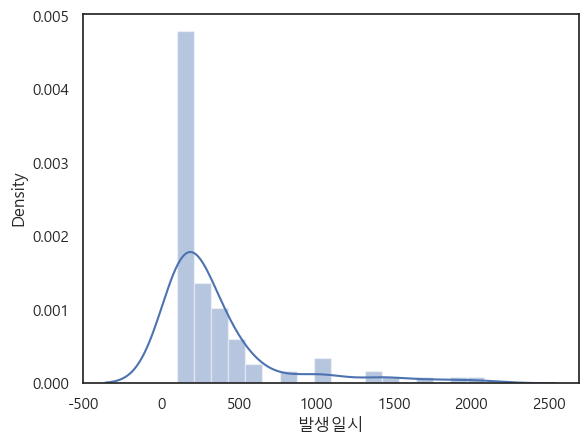

In [9]:
sns.distplot(df['발생일시'])

C:\Users\hyorim\AppData\Local\Temp\ipykernel_21056\1596815788.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['사망자수'])


<AxesSubplot: xlabel='사망자수', ylabel='Density'>

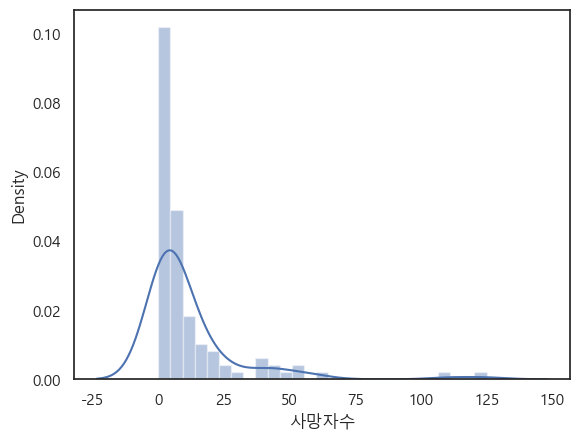

In [10]:
sns.distplot(df['사망자수'])

In [12]:
from sklearn.cluster import KMeans

# X1에 'Age' , 'Spending Score (1-100)'의 값을 넣어줍니다.  
X1 = df[['발생일시' , '사망자수']].values

# inertia 라는 빈 리스트를 만들어줍니다. 
inertia = []

# 군집수 n을 1에서 11까지 돌아가며 X1에 대해 k-means++ 알고리즘을 적용하여 inertia를 리스트에 저장합니다. 
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='lloyd') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

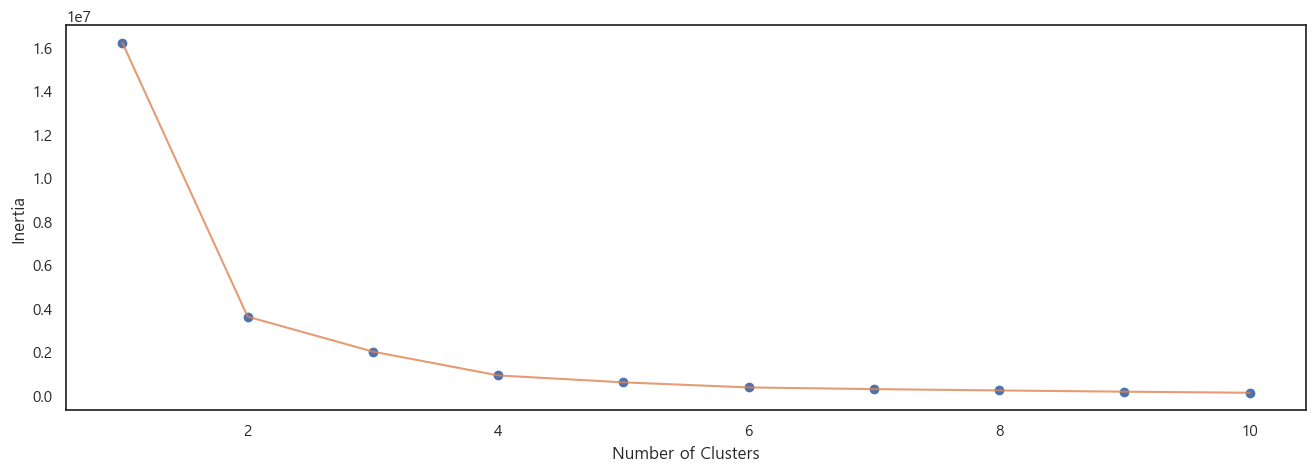

In [15]:
plt.figure(1 , figsize = (16 ,5)) # 사이즈 지정
plt.plot(np.arange(1 , 11) , inertia , 'o') #11개의 inertia 값 점으로 찍어주기
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.8) # 11개의 inertia값 선으로 연결하기
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [16]:
# 군집수를 4로 지정하여 시각화 해봅니다. 
algorithm = (KMeans(n_clusters = 2 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

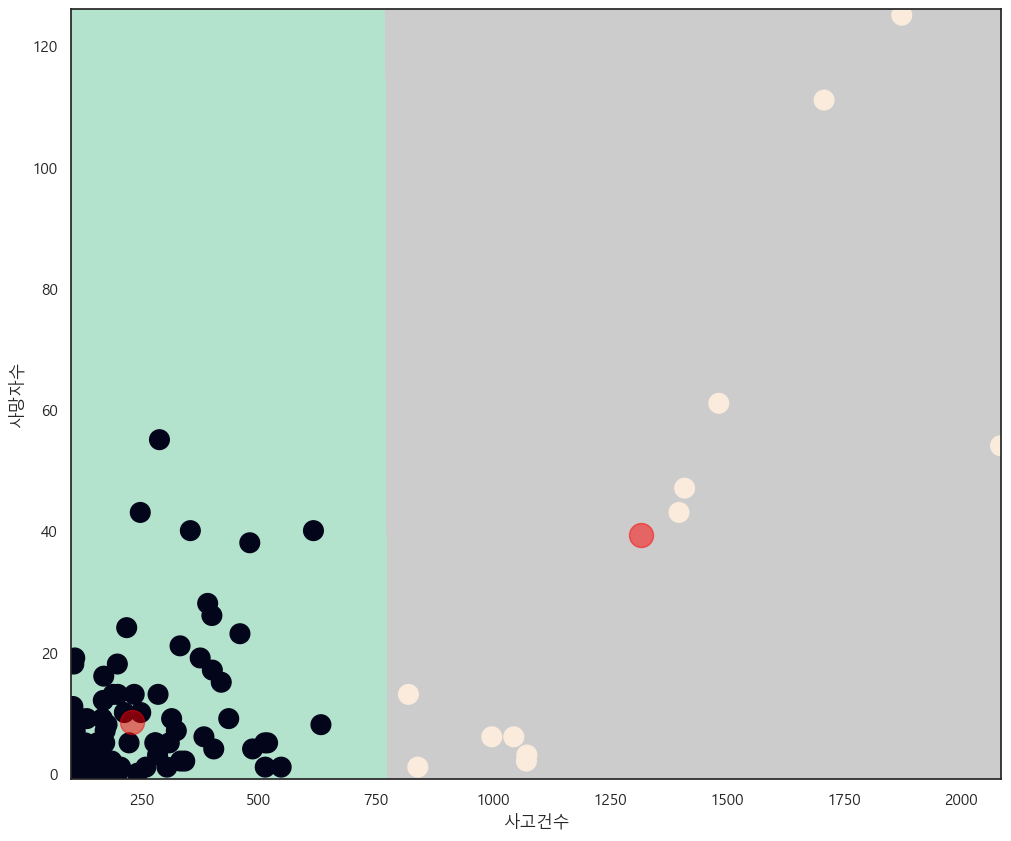

In [21]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

plt.figure(1 , figsize = (12 ,10) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = '발생일시' ,y = '사망자수' , data = df , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('사망자수')
plt.xlabel('사고건수')
plt.show()


In [ ]:
# 군집수를 4로 지정하여 시각화 해봅니다. 
algorithm = (KMeans(n_clusters = 3 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

plt.figure(1 , figsize = (12 ,10) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = '발생일시' ,y = '사망자수' , data = df , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('사망자수')
plt.xlabel('사고건수')
plt.show()


In [ ]:
# 군집수를 4로 지정하여 시각화 해봅니다. 
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

plt.figure(1 , figsize = (12 ,10) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = '발생일시' ,y = '사망자수' , data = df , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('사망자수')
plt.xlabel('사고건수')
plt.show()


For n_clusters = 2 The average silhouette_score is : 0.8168665628138505

For n_clusters = 3 The average silhouette_score is : 0.7419813621391899

For n_clusters = 4 The average silhouette_score is : 0.6692478698545017

For n_clusters = 5 The average silhouette_score is : 0.6742331551107019

For n_clusters = 6 The average silhouette_score is : 0.6484931108474566

For n_clusters = 7 The average silhouette_score is : 0.5734435537410357

For n_clusters = 8 The average silhouette_score is : 0.5978755909785698

For n_clusters = 9 The average silhouette_score is : 0.5900744118898208

For n_clusters = 10 The average silhouette_score is : 0.5901108489361698

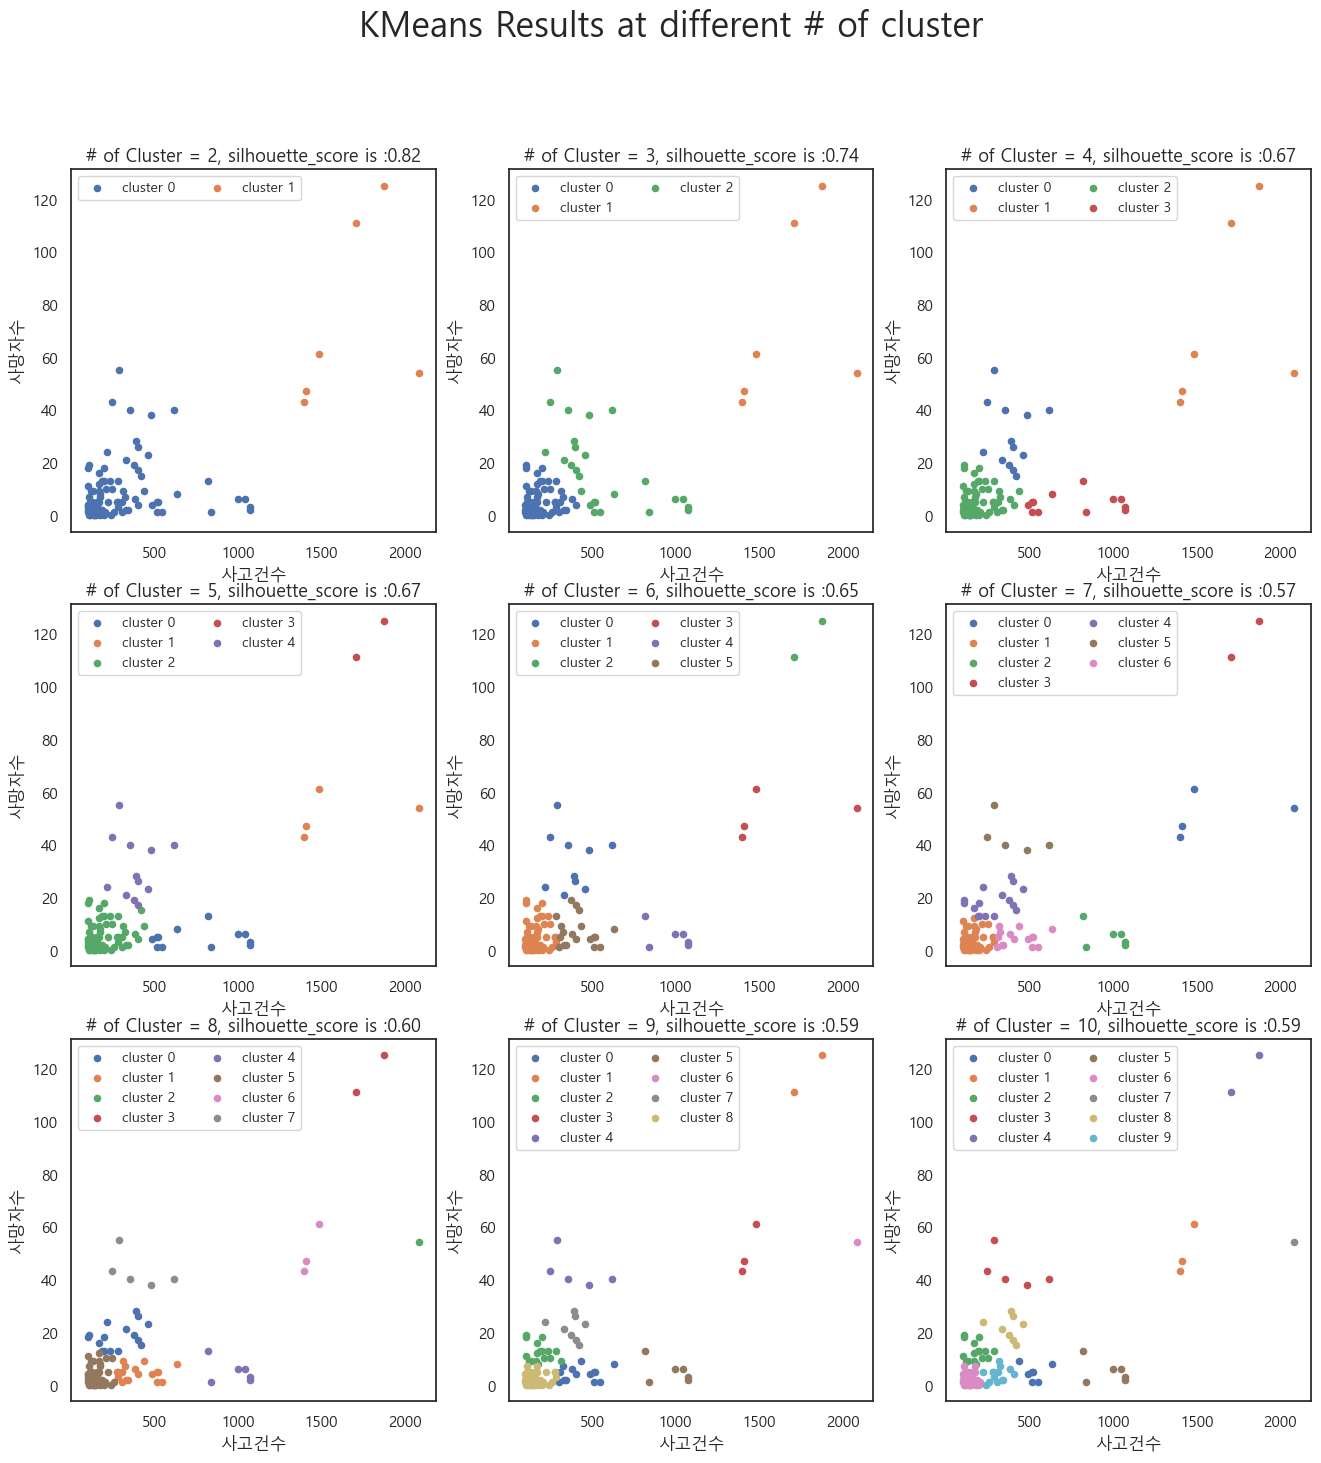

In [149]:
from sklearn.mixture import GaussianMixture
silhouette_score = [0.8168, 0.7419, 0.6692, 0.6742, 0.6484, 0.5734, 0.5978, 0.5900, 0.5901]
# 다중 플롯 동시 시각화
f, ax = plt.subplots(3,3)
f.set_size_inches((16, 16))

plt.suptitle('KMeans Results at different # of cluster', size=25)

for i in range(9):
    # 군집화 및 시각화 과정 자동화
    kmeans = KMeans(n_clusters = i+2 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 42  , algorithm='lloyd')
    
    kmeans.fit_predict(df_scale[['발생일시', '사망자수']])

    df_scale['kmeans_results'] = kmeans.fit_predict(df_scale[['발생일시', '사망자수']])

    for j in range(df_scale['kmeans_results'].max() + 1):
        ax[i // 3, i % 3].scatter(df.loc[df_scale['kmeans_results'] == j, '발생일시'], df.loc[df_scale['kmeans_results'] == j, '사망자수'], 
                        label = 'cluster ' + str(j), s=20)

    ax[i // 3, i % 3].legend(loc='upper left', ncol=2, fontsize=10)
    ax[i // 3, i % 3].set_title('# of Cluster = %1d, silhouette_score is :%.2f'%(i+2, silhouette_score[i]), size=13)
    ax[i // 3, i % 3].set_xlabel('사고건수')
    ax[i // 3, i % 3].set_ylabel('사망자수')

In [ ]:
# 클러스터의 갯수 리스트를 만들어줍니다. 
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

# 사용할 컬럼 값을 지정해줍니다. 
X = df[['발생일시', '사망자수']].values


for n_clusters in range_n_clusters:
    # 1 X 2 의 서브플롯을 만듭니다. 
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # 첫 번째 서브플롯은 실루엣 플롯입니다. 
    # silhouette coefficient는 -1에서 1 사이의 값을 가집니다.
    # 하지만 시각화에서는 -0.1에서 1사이로 지정해줍니다. 
    ax1.set_xlim([-0.1, 1])

    # clusterer를 n_clusters 값으로 초기화 해줍니다.  
    # 재현성을 위해 random seed를 10으로 지정 합니다.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X)

    # silhouette_score는 모든 샘플에 대한 평균값을 제공합니다. 
    # 실루엣 스코어는 형성된 군집에 대해 밀도(density)와 분리(seperation)에 대해 견해를 제공합니다. 
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # 각 샘플에 대한 실루엣 스코어를 계산합니다. 
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # 클러스터 i에 속한 샘플들의 실루엣 스코어를 취합하여 정렬합니다. 
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # 각 클러스터의 이름을 달아서 실루엣 플롯의 Label을 지정해줍니다. 
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # 다음 플롯을 위한 새로운 y_lower를 계산합니다.
        y_lower = y_upper + 10  # 10 for the 0 samples






    # ax1.set_title("The silhouette plot for the various clusters.")
    # ax1.set_xlabel("The silhouette coefficient values")
    # ax1.set_ylabel("Cluster label")

    # # 모든 값에 대한 실루엣 스코어의 평균을 수직선으로 그려줍니다. 
    # ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    # ax1.set_yticks([])  # yaxis labels / ticks 를 지워줍니다. 
    # ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # # 두 번째 플롯이 실제 클러스터가 어떻게 형성되었는지 시각화 합니다. 
    # colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    # ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
    #             c=colors, edgecolor='k')

    # # 클러스터의 이름을 지어줍니다. 
    # centers = clusterer.cluster_centers_
    # # 클러스터의 중앙에 하얀 동그라미를 그려줍니다. 
    # ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
    #             c="white", alpha=1, s=200, edgecolor='k')

    # for i, c in enumerate(centers):
    #     ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
    #                 s=50, edgecolor='k')

    # ax2.set_title("The visualization of the clustered data.")
    # ax2.set_xlabel("Feature space for the 1st feature")
    # ax2.set_ylabel("Feature space for the 2nd feature")

    # plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
    #               "with n_clusters = %d" % n_clusters),
    #              fontsize=14, fontweight='bold')

plt.show()

# DBScan

In [28]:
from sklearn.preprocessing import StandardScaler

# 두 가지 feature를 대상
data = df[['발생일시', '사망자수']]

# 정규화 진행
scaler = StandardScaler()
df_scale = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)

In [34]:
from sklearn.cluster import DBSCAN

# epsilon, 최소 샘플 개수 설정
model = DBSCAN(eps=0.5, min_samples=3)

# 군집화 모델 학습 및 클러스터 예측 결과 반환
model.fit(df_scale)
df_scale['cluster'] = model.fit_predict(df_scale)

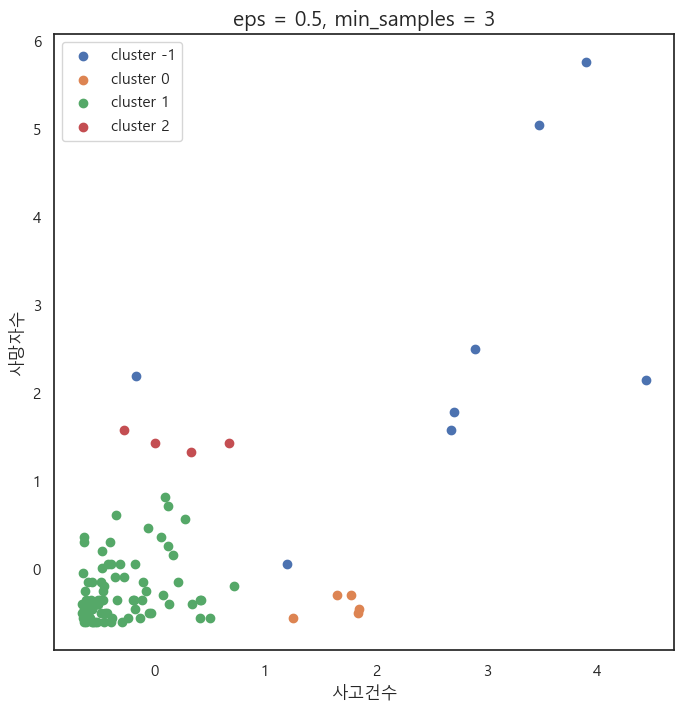

In [36]:
plt.figure(figsize = (8, 8))

# 이상치 번호는 -1, 클러스터 최대 숫자까지 iteration
for i in range(-1, df_scale['cluster'].max() + 1):
    plt.scatter(df_scale.loc[df_scale['cluster'] == i, '발생일시'], df_scale.loc[df_scale['cluster'] == i, '사망자수'], 
                    label = 'cluster ' + str(i))

plt.legend()
plt.title('eps = 0.5, min_samples = 3', size = 15)
plt.xlabel('사고건수', size = 12)
plt.ylabel('사망자수', size = 12)
plt.show()

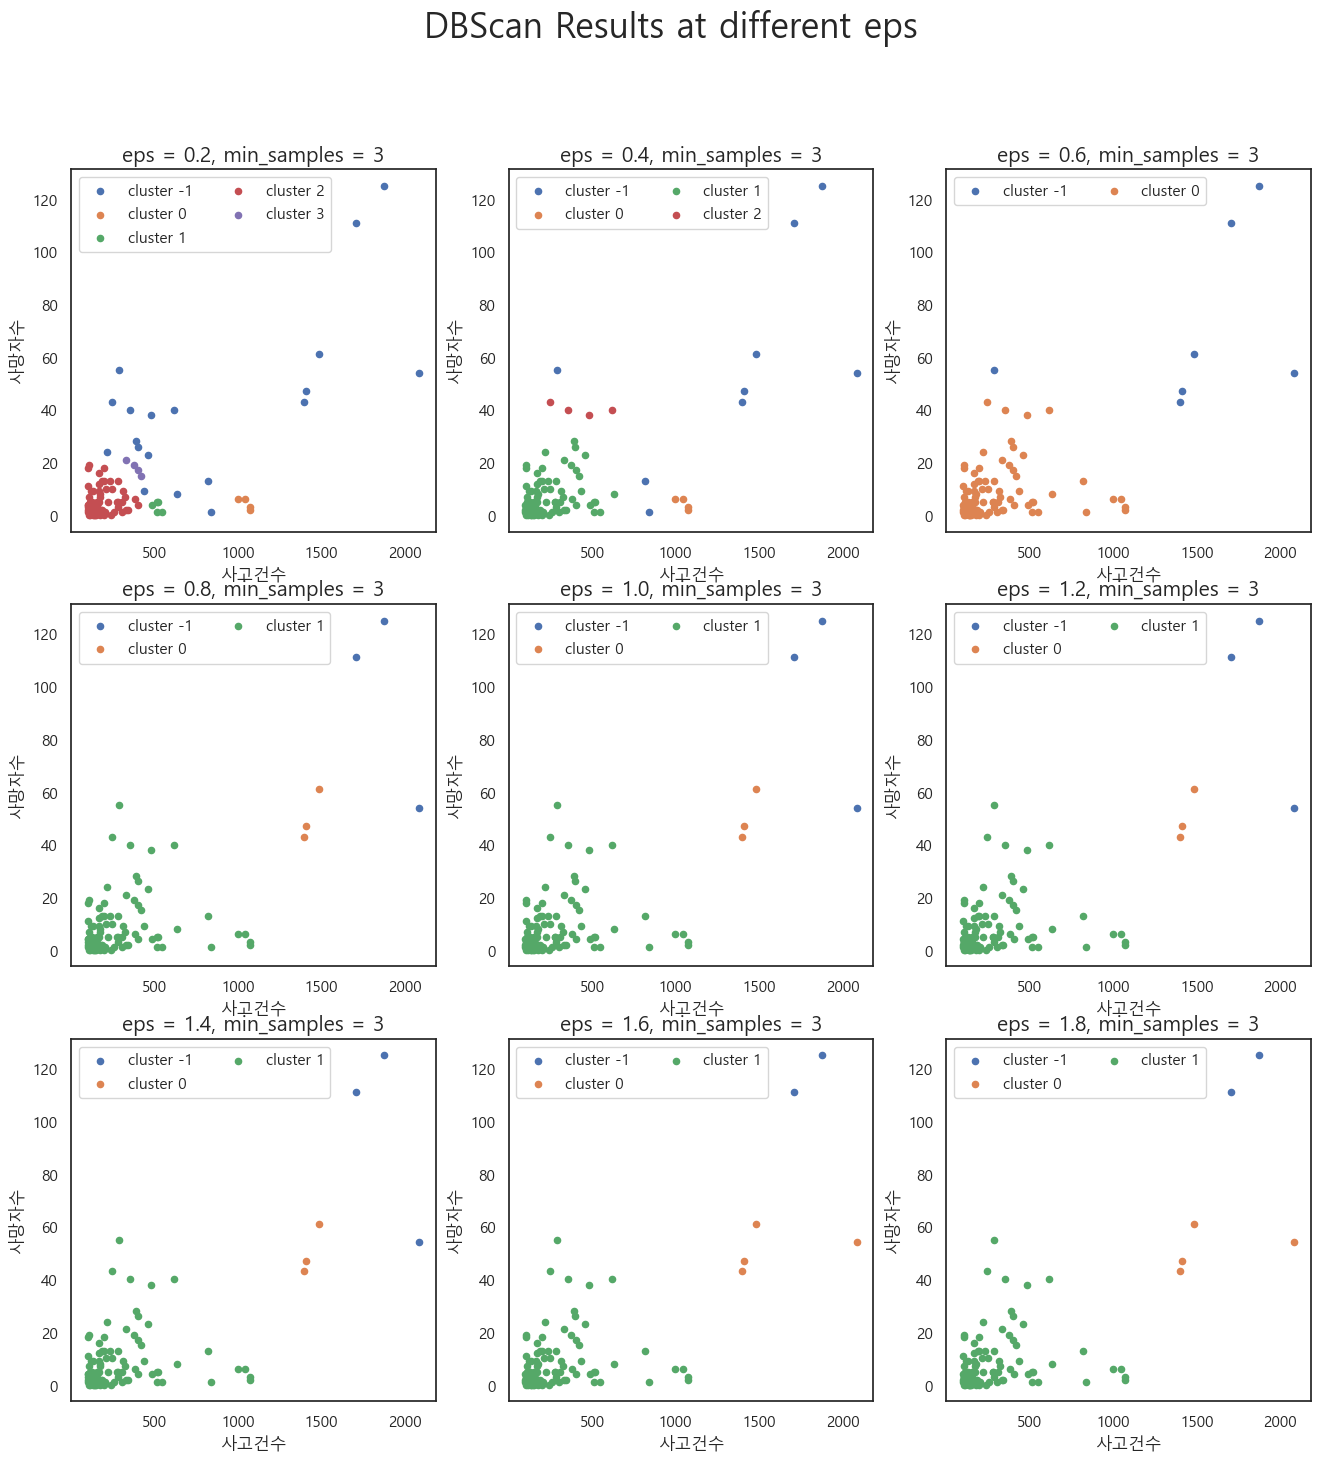

In [141]:
# 다중 플롯 동시 시각화
f, ax = plt.subplots(3,3)
f.set_size_inches((16, 16))

plt.suptitle('DBScan Results at different eps', size=25)
for i in range(9):
    # epsilon을 증가시키면서 반복
    eps = 0.2 * (i + 1)
    min_samples = 3

    # 군집화 및 시각화 과정 자동화
    model = DBSCAN(eps=eps, min_samples=min_samples)
    # model.fit_predict(df_scale)
    df_scale['cluster'] = model.fit_predict(df_scale[['발생일시', '사망자수']])

    for j in range(-1, df_scale['cluster'].max() + 1):
        ax[i // 3, i % 3].scatter(df.loc[df_scale['cluster'] == j, '발생일시'], df.loc[df_scale['cluster'] == j, '사망자수'], 
                        label = 'cluster ' + str(j), s=20)

    ax[i // 3, i % 3].legend(loc='upper left', ncol=2)
    ax[i // 3, i % 3].set_title('eps = %.1f, min_samples = %d'%(eps, min_samples), size = 15)
    ax[i // 3, i % 3].set_xlabel('사고건수')
    ax[i // 3, i % 3].set_ylabel('사망자수')
plt.show()

# Affinity Propagation clustering algorithm

c:\Users\hyorim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_affinity_propagation.py:236: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
c:\Users\hyorim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_affinity_propagation.py:236: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
c:\Users\hyorim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_affinity_propagation.py:236: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
c:\Users\hyorim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_affinity_propagation.py:236: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers a

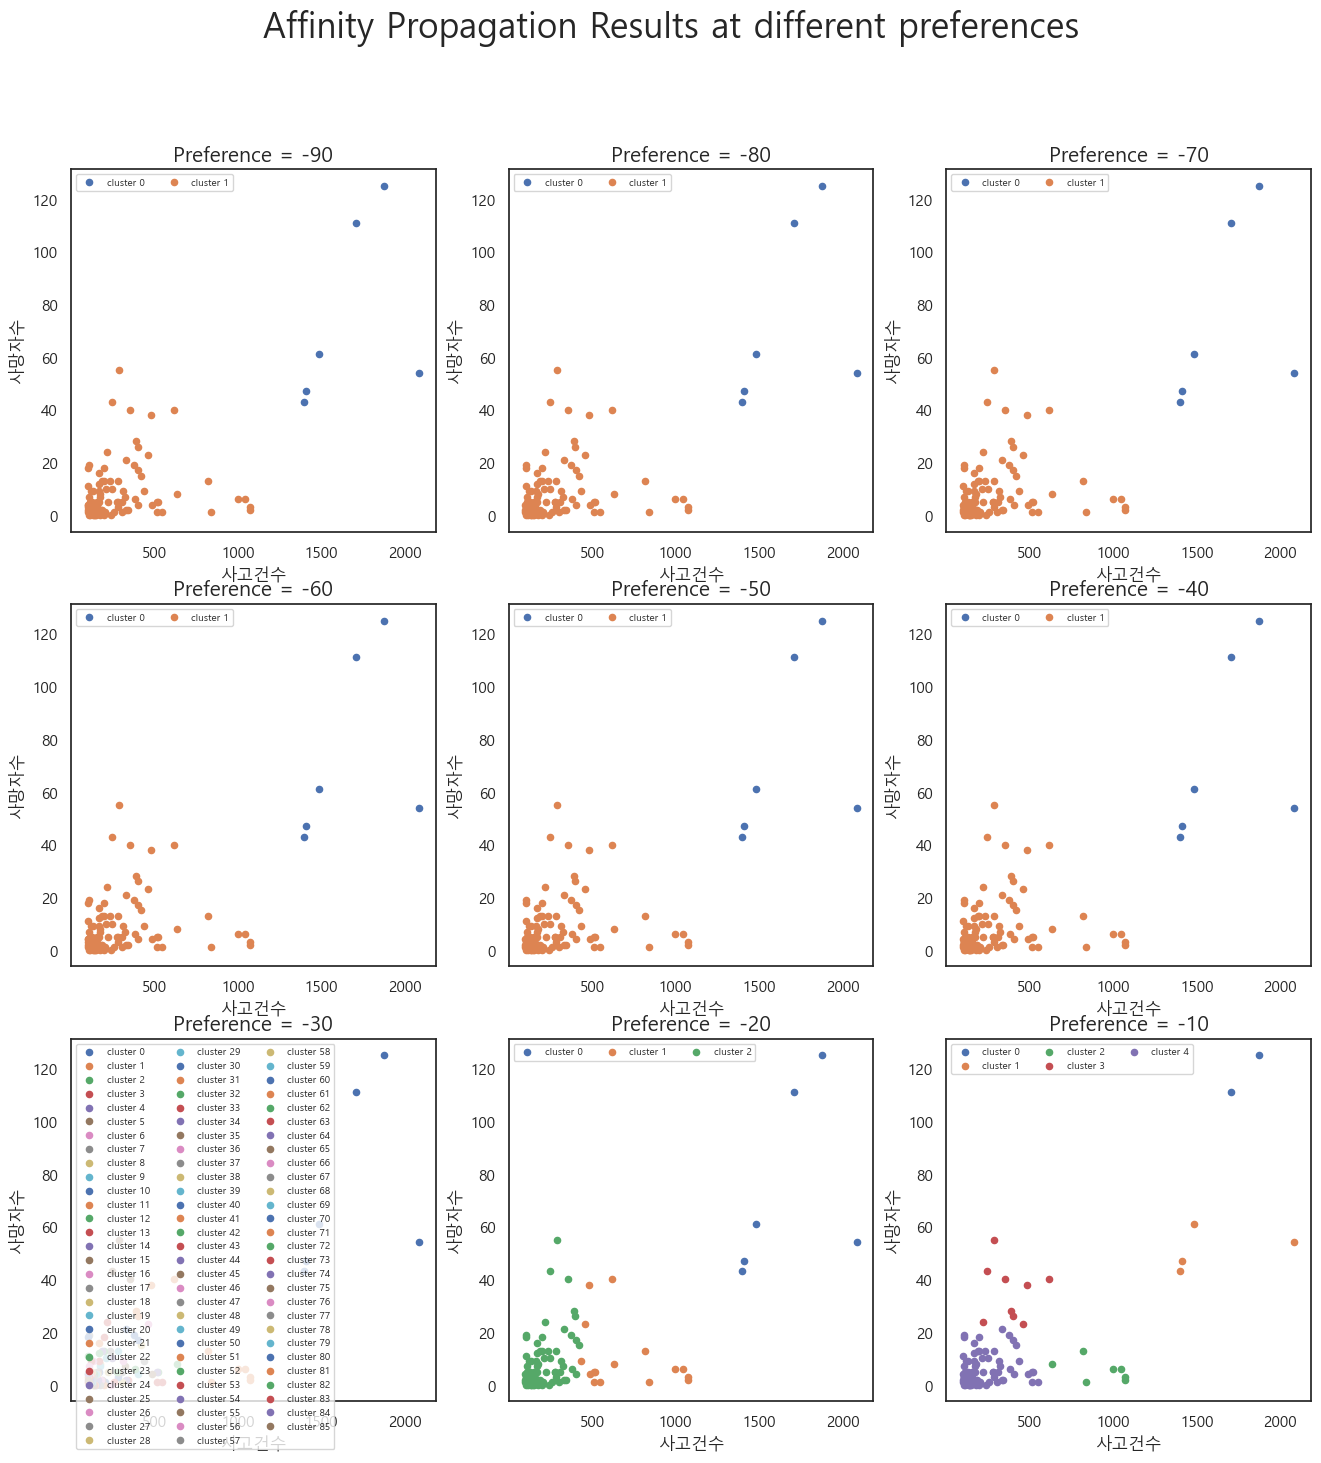

In [150]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AffinityPropagation
# 다중 플롯 동시 시각화
f, ax = plt.subplots(3,3)
f.set_size_inches((16, 16))

plt.suptitle('Affinity Propagation Results at different preferences', size=25)

for i in range(9):
    # epsilon을 증가시키면서 반복
    pref = -90 + (i * 10)

    # 군집화 및 시각화 과정 자동화
    model = AffinityPropagation(preference=pref, random_state=42)
    model.fit(df_scale[['발생일시', '사망자수']])

    df_scale['ap_results'] = model.fit_predict(df_scale[['발생일시', '사망자수']])

    for j in range(df_scale['ap_results'].max() + 1):
        ax[i // 3, i % 3].scatter(df.loc[df_scale['ap_results'] == j, '발생일시'], df.loc[df_scale['ap_results'] == j, '사망자수'], 
                        label = 'cluster ' + str(j), s=20)

    ax[i // 3, i % 3].legend(loc='upper left', ncol=3, fontsize=7)
    ax[i // 3, i % 3].set_title('Preference = {}'.format(pref), size=15)
    ax[i // 3, i % 3].set_xlabel('사고건수')
    ax[i // 3, i % 3].set_ylabel('사망자수')

  
# fig, axs = plt.subplots(3, 3, figsize=(16, 16))
# axs = axs.flatten()

# for i, pref in enumerate(range(-80, 1, 10)):
#     af_clustering = af_results[i]
#     ax = axs[i]
#     ax.scatter(df_scale['발생일시'], df_scale['사망자수'], c=af_clustering.labels_, alpha=1, edgecolors='b', cmap=plt.cm.tab20c)
#     # ax.legend(np.unique(af_clustering.labels_), ncol=3)
#     ax.set_title('Preference = {}'.format(pref), size=15)
    
# plt.suptitle('Affinity Propagation Results at different preferences', size=25)

# plt.tight_layout()

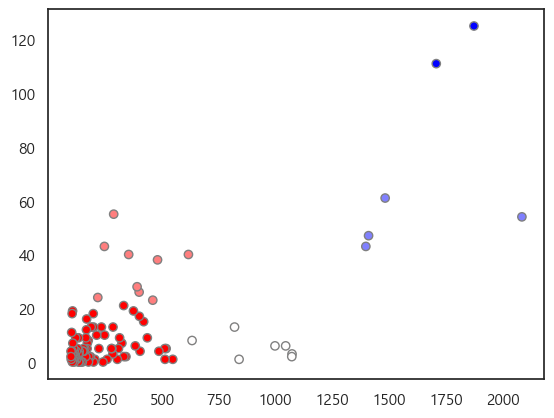

In [237]:
ap = AffinityPropagation(preference=-10, random_state=42)
ap_labels = ap.fit_predict(df_scale[['발생일시', '사망자수']])
f, ax = plt.subplots(1,1)

df_scale['ap_cluster_-10'] = ap_labels

# for j in range(df_scale['ap_cluster_-10'].max() + 1):
#         ax.scatter(df.loc[df_scale['ap_cluster_-10'] == j, '발생일시'], df.loc[df_scale['ap_cluster_-10'] == j, '사망자수'], 
#                         label = 'cluster ' + str(j), s=25, edgecolors='black')

scatter = ax.scatter(df['발생일시'], df['사망자수'], c=ap_labels, alpha=1, edgecolors='gray', cmap='bwr')

# legend1 = ax.legend(*scatter.legend_elements(num=4), loc='upper left', ncol=2, fontsize=7, title='Cluster No.')
# ax.add_artist(legend1)
# ax.legend('upper_left')

In [169]:
df_scale.to_csv('D:/사고데이터/사고건수사망자수_60_cluster.csv', encoding='utf-8-sig')

#                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         


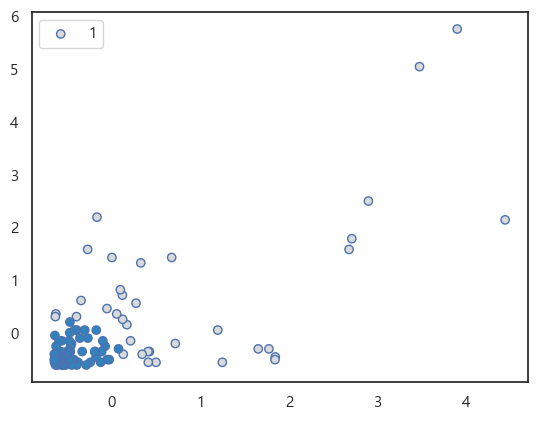

In [77]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=42)
gmm_labels = gmm.fit_predict(df_scale[['발생일시', '사망자수']])

df_scale['gmm_cluster'] = gmm_labels

plt.scatter(df_scale['발생일시'], df_scale['사망자수'], c=gmm_labels, alpha=1, edgecolors='b', cmap=plt.cm.tab20c)
plt.legend(df_scale['gmm_cluster'].unique())

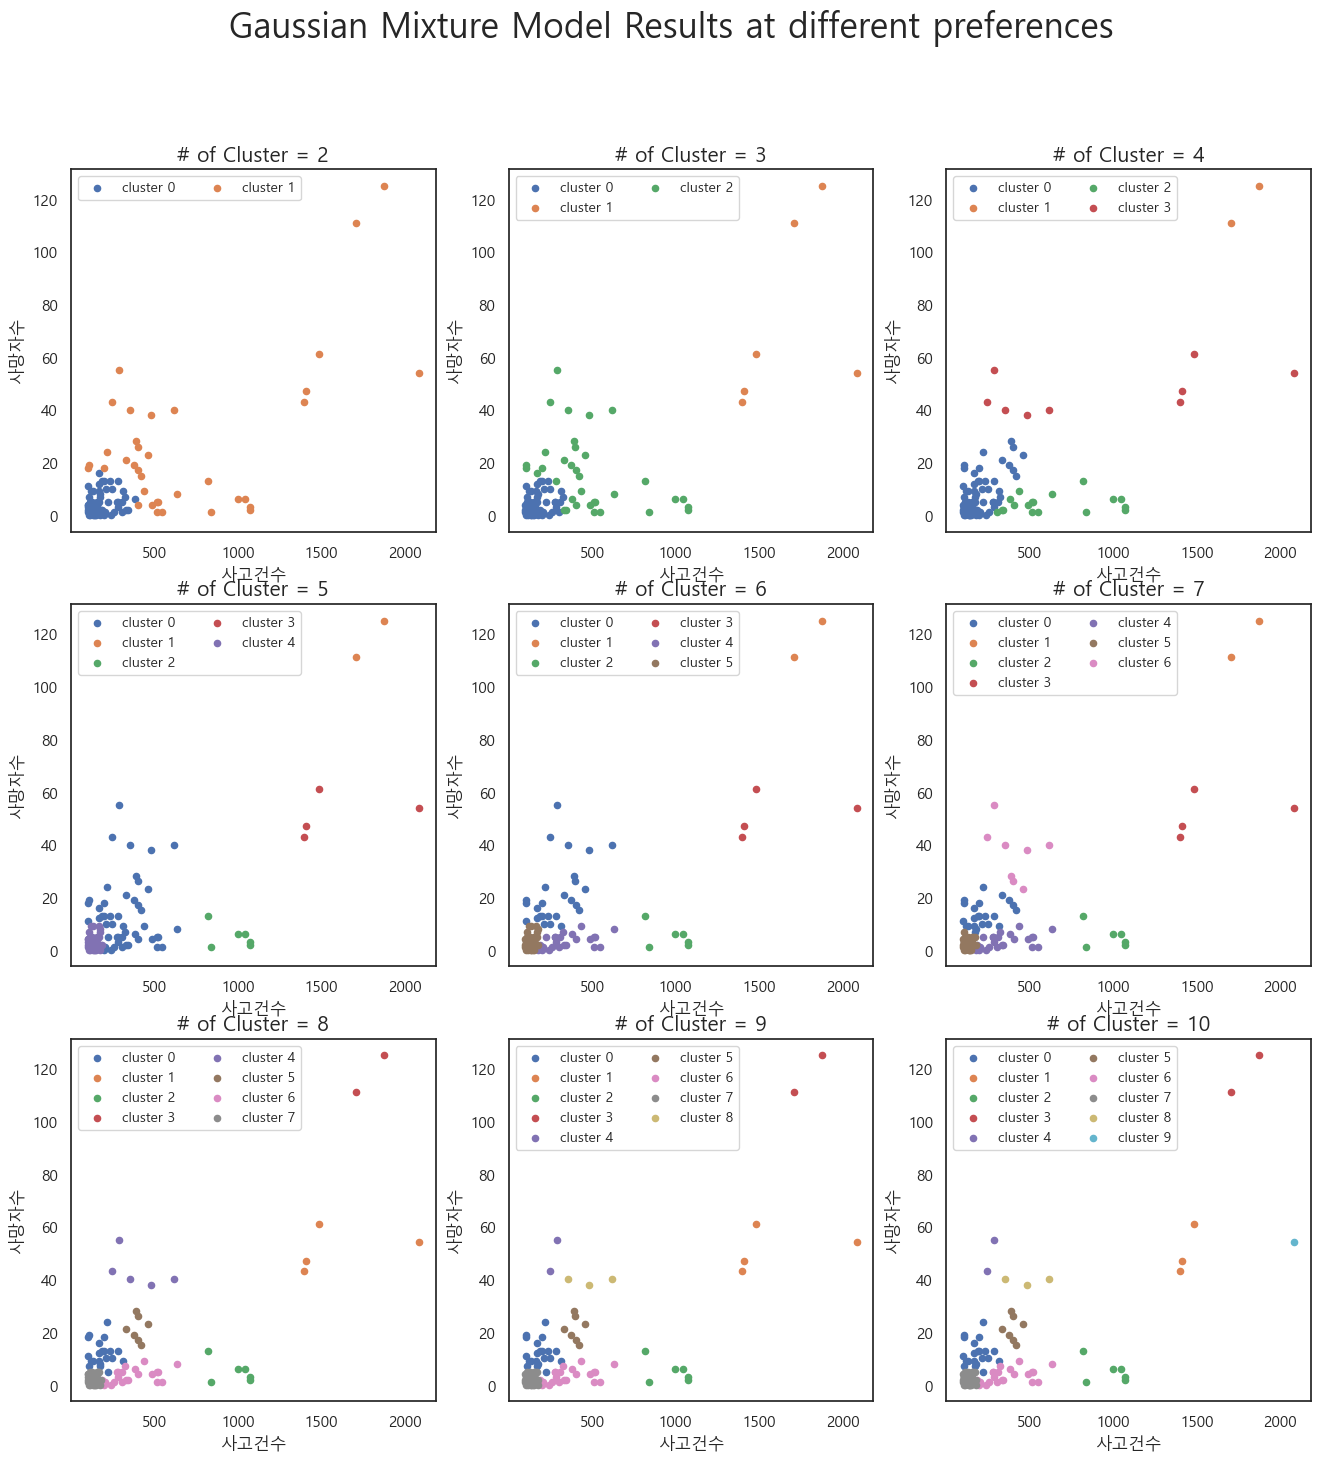

In [139]:
from sklearn.mixture import GaussianMixture

# 다중 플롯 동시 시각화
f, ax = plt.subplots(3,3)
f.set_size_inches((16, 16))

plt.suptitle('Gaussian Mixture Model Results at different preferences', size=25)

for i in range(9):
    # 군집화 및 시각화 과정 자동화
    gmm = GaussianMixture(n_components=i+2, random_state=42)
    gmm.fit_predict(df_scale[['발생일시', '사망자수']])

    df_scale['gmm_results'] = gmm.fit_predict(df_scale[['발생일시', '사망자수']])

    for j in range(df_scale['gmm_results'].max() + 1):
        ax[i // 3, i % 3].scatter(df.loc[df_scale['gmm_results'] == j, '발생일시'], df.loc[df_scale['gmm_results'] == j, '사망자수'], 
                        label = 'cluster ' + str(j), s=20)

    ax[i // 3, i % 3].legend(loc='upper left', ncol=2, fontsize=10)
    ax[i // 3, i % 3].set_title('# of Cluster = {}'.format(i+2), size=15)
    ax[i // 3, i % 3].set_xlabel('사고건수')
    ax[i // 3, i % 3].set_ylabel('사망자수')


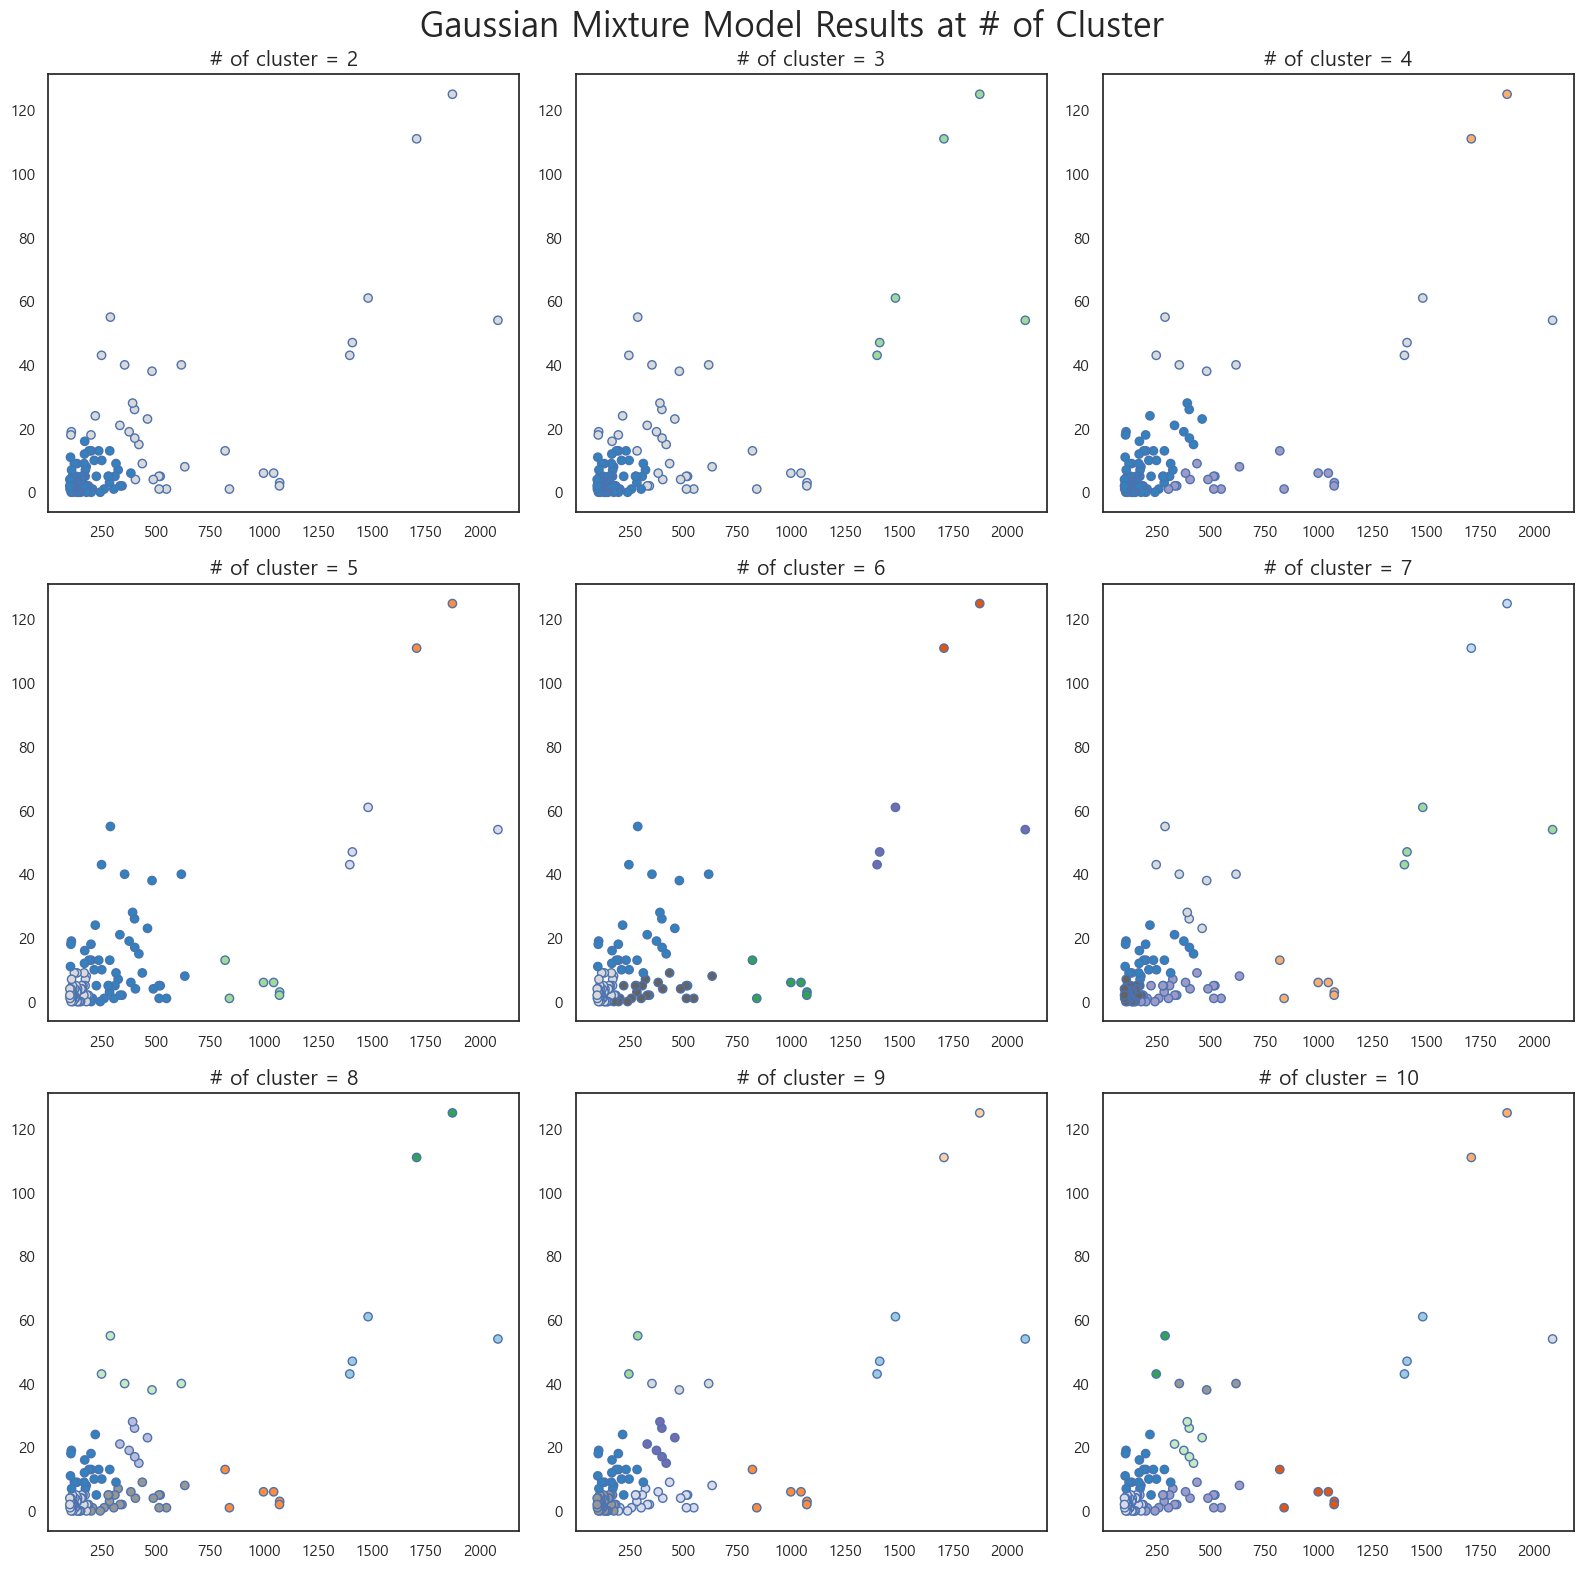

In [110]:
gmm_results = []

for n in range(2,11):
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm_results.append(gmm.fit_predict(df_scale[['발생일시', '사망자수']]))
    

fig, axs = plt.subplots(3, 3, figsize=(16, 16))
axs = axs.flatten()

for i in range(len(gmm_results)):
    af_clustering = gmm_results[i]
    ax = axs[i]
    ax.scatter(df['발생일시'], df['사망자수'], c=gmm_results[i], alpha=1, edgecolors='b', cmap=plt.cm.tab20c)
    # ax.legend(np.unique(af_clustering.labels_), ncol=3)
    ax.set_title('# of cluster = {}'.format(i+2), size=15)
    
plt.suptitle('Gaussian Mixture Model Results at # of Cluster', size=25)

plt.tight_layout()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


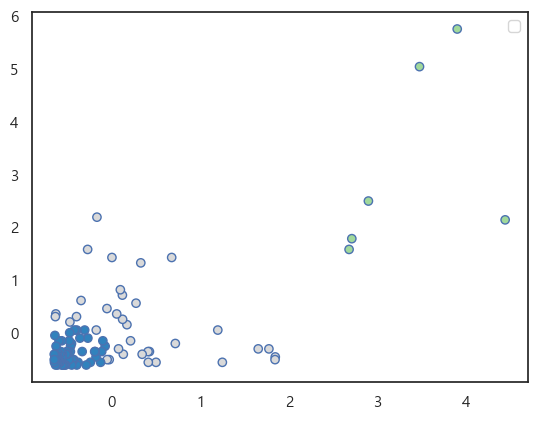

In [170]:
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(df_scale[['발생일시', '사망자수']])

df_scale['gmm_cluster'] = gmm_labels

plt.scatter(df_scale['발생일시'], df_scale['사망자수'], c=gmm_labels, alpha=1, edgecolors='b', cmap=plt.cm.tab20c)
plt.legend()

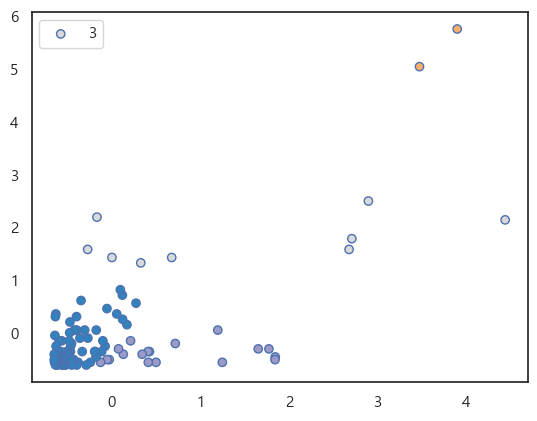

In [80]:
gmm = GaussianMixture(n_components=4, random_state=42)
gmm_labels = gmm.fit_predict(df_scale[['발생일시', '사망자수']])

df_scale['gmm_cluster'] = gmm_labels

plt.scatter(df_scale['발생일시'], df_scale['사망자수'], c=gmm_labels, alpha=1, edgecolors='b', cmap=plt.cm.tab20c)
plt.legend(df_scale['gmm_cluster'].unique())

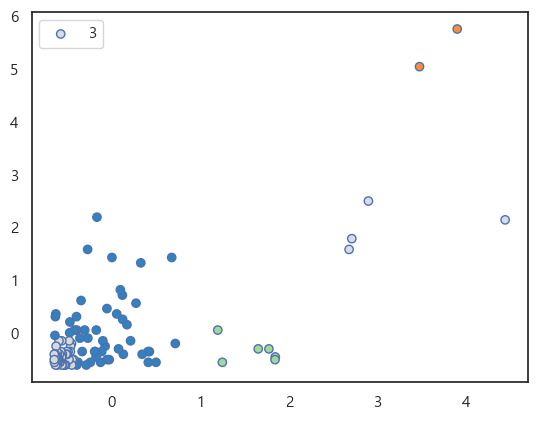

In [81]:
gmm = GaussianMixture(n_components=5, random_state=42)
gmm_labels = gmm.fit_predict(df_scale[['발생일시', '사망자수']])

df_scale['gmm_cluster'] = gmm_labels

plt.scatter(df_scale['발생일시'], df_scale['사망자수'], c=gmm_labels, alpha=1, edgecolors='b', cmap=plt.cm.tab20c)
plt.legend(df_scale['gmm_cluster'].unique())

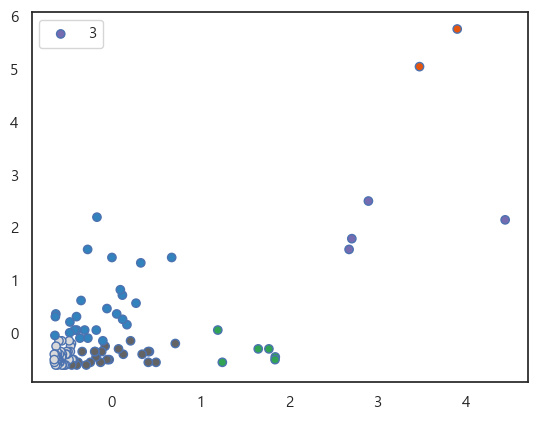

In [82]:
gmm = GaussianMixture(n_components=6, random_state=42)
gmm_labels = gmm.fit_predict(df_scale[['발생일시', '사망자수']])

df_scale['gmm_cluster'] = gmm_labels

plt.scatter(df_scale['발생일시'], df_scale['사망자수'], c=gmm_labels, alpha=1, edgecolors='b', cmap=plt.cm.tab20c)
plt.legend(df_scale['gmm_cluster'].unique())

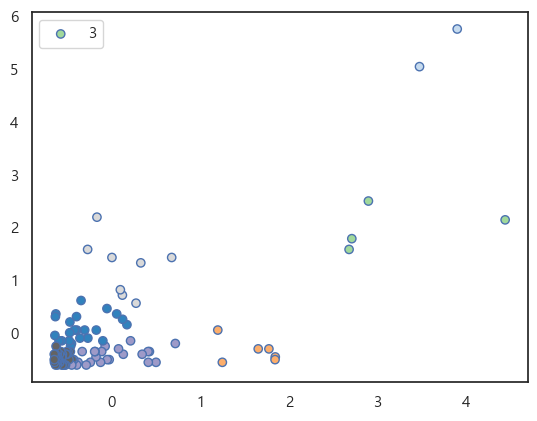

In [83]:
gmm = GaussianMixture(n_components=7, random_state=42)
gmm_labels = gmm.fit_predict(df_scale[['발생일시', '사망자수']])

df_scale['gmm_cluster'] = gmm_labels

plt.scatter(df_scale['발생일시'], df_scale['사망자수'], c=gmm_labels, alpha=1, edgecolors='b', cmap=plt.cm.tab20c)
plt.legend(df_scale['gmm_cluster'].unique())

In [78]:
df_scale['gmm_cluster'].unique()

array([1, 0], dtype=int64)

In [ ]:
patterns = df['pattern']
count = df['발생일시']
dead = df['사망자수']

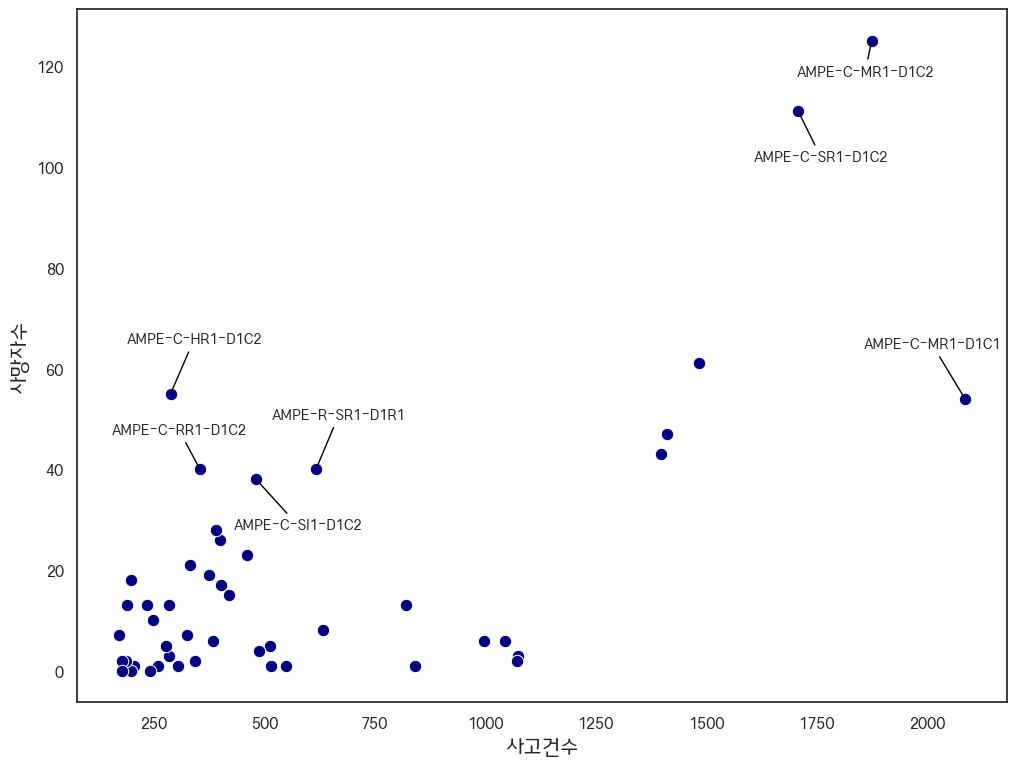

In [ ]:
fig = plt.subplots(figsize=(12,9))
fig = sns.scatterplot(x=df['count'], y=df['사망자수'], s=80, color='navy')
fig.set_ylabel("사망자수", size=15)
fig.set_xlabel("사고건수", size=15)

plt.annotate(patterns[0], (count[0], dead[0]), xytext=(count[0]-230, dead[0]+10), arrowprops=dict(arrowstyle="-", color='black'),size=10)
plt.annotate(patterns[1], (count[1], dead[1]), xytext=(count[1]-170, dead[1]-7), arrowprops=dict(arrowstyle="-", color='black'),size=10)
plt.annotate(patterns[2], (count[2], dead[2]), xytext=(count[2]-100, dead[2]-10), arrowprops=dict(arrowstyle="-", color='black'),size=10)
plt.annotate(patterns[31], (count[31], dead[31]), xytext=(count[31]-100, dead[31]+10), arrowprops=dict(arrowstyle="-", color='black'),size=10)
plt.annotate(patterns[26], (count[26], dead[26]), xytext=(count[26]-200, dead[26]+7), arrowprops=dict(arrowstyle="-", color='black'),size=10)
plt.annotate(patterns[13], (count[13], dead[13]), xytext=(count[13]-100, dead[13]+10), arrowprops=dict(arrowstyle="-", color='black'),size=10)
plt.annotate(patterns[18], (count[18], dead[18]), xytext=(count[18]-50, dead[18]-10), arrowprops=dict(arrowstyle="-", color='black'),size=10)

plt.savefig('sample.png')